# Optical Character Recognition Using TensorFlow

In [1]:
import numpy as np
import sys
import tensorflow as tf #a library for machine learning
from tensorflow import keras #a library for deep learning in Python
import matplotlib.pyplot as plt

### First, we choose a dataset and give it a name

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

### What do the training images look like (to the computer, and to us)?

In [3]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
train_images.shape #the dataset contains 60 thousand images; each has 28x28 pixels 

(60000, 28, 28)

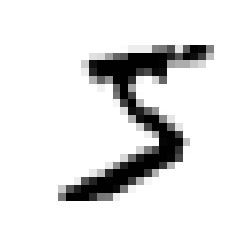

In [5]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.grid(False)
plt.axis('off')
plt.show()

### Next, we preprocess the images to make the math work

In [6]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

### Then we put the layers of the network together

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #The images are stored as 28x28 arrays - this flattens them
    keras.layers.Dense(128, activation=tf.nn.relu), #This layer has 128 nodes/neurons which are densely connected
    keras.layers.Dense(10, activation=tf.nn.softmax)]) #This layer has 10 nodes - softmax gives us a probability that an image belongs to each class 


model.compile(optimizer='adam', #tells us how to update the model (weights) based on loss - same purpose as gradient descent, different operation
             loss='sparse_categorical_crossentropy', #measures accuracy - difference between actual label and predicted label; like mean squared error
             metrics=['accuracy']) #keeps track of accuracy - what % do we get right?

model.fit(train_images, train_labels, epochs=5) #trains the network

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 20s 335us/sample - loss: 0.2567 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 21s 357us/sample - loss: 0.1111 - acc: 0.9675
Epoch 3/5
60000/60000 [==============================] - 22s 370us/sample - loss: 0.0779 - acc: 0.9768
Epoch 4/5
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0568 - acc: 0.9825
Epoch 5/5
60000/60000 [==============================] - 23s 376us/sample - loss: 0.0438 - acc: 0.9867


### Now that the network has been trained using the training data, we can test the accuracy of our predictions with the test data

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

predictions = model.predict(test_images)


10000/10000 [==============================] - 3s 251us/sample - loss: 0.0820 - acc: 0.9760


### What does a prediction look like?

In [9]:
predictions [0]

array([3.6071876e-07, 2.2770770e-08, 2.8450697e-05, 6.2359532e-04,
       5.1803917e-10, 7.4338210e-08, 1.7823228e-10, 9.9933618e-01,
       2.8324821e-06, 8.4649528e-06], dtype=float32)

In [10]:
np.argmax(predictions[0])

7

### Visualizing the output

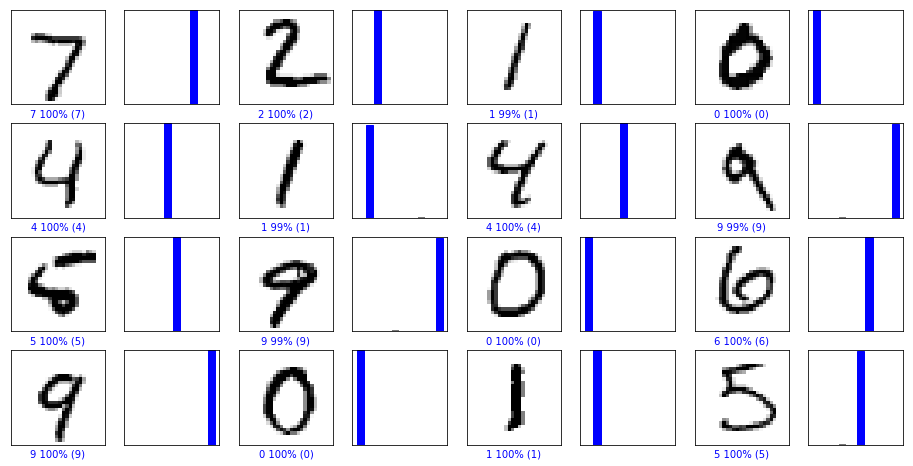

In [11]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array) 
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
  
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                    100*np.max(predictions_array),
                                    true_label),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



rows = 4
columns = 4
images = rows*columns
plt.figure(figsize=(2*2*columns, 2*rows))

for i in range(images):
    plt.subplot(rows, 2*columns, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(rows, 2*columns, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

### What if we used different activation, optimizer and cost functions?

Epoch 1/5
60000/60000 [==============================] - 17s 286us/sample - loss: 1.4521 - acc: 0.7010
Epoch 2/5
60000/60000 [==============================] - 16s 263us/sample - loss: 0.7045 - acc: 0.8475
Epoch 3/5
60000/60000 [==============================] - 17s 282us/sample - loss: 0.5243 - acc: 0.8722
Epoch 4/5
60000/60000 [==============================] - ETA: 0s - loss: 0.4486 - acc: 0.884 - 15s 246us/sample - loss: 0.4486 - acc: 0.8840
Epoch 5/5
10000/10000 [==============================] - 2s 163us/sample - loss: 0.3733 - acc: 0.9007


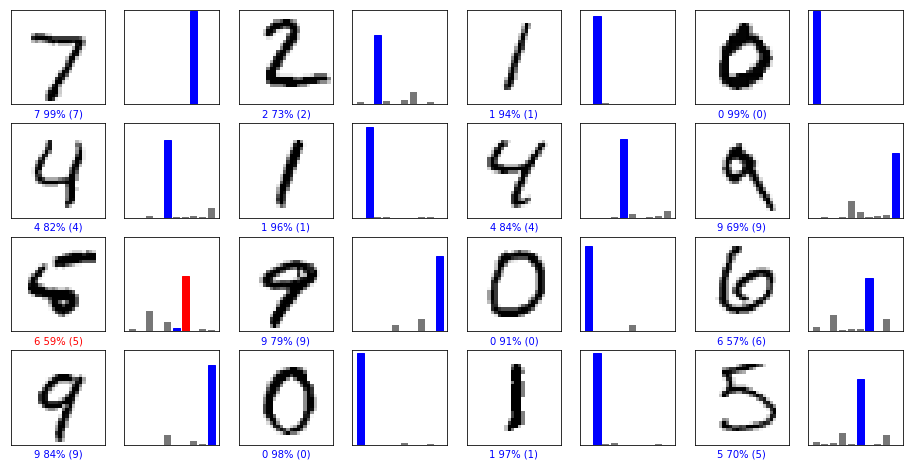

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)]) 

model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(images):
    plt.subplot(rows, 2*columns, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(rows, 2*columns, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 14s 238us/sample - loss: 27.3067 - acc: 0.1994
Epoch 2/5
60000/60000 [==============================] - 13s 219us/sample - loss: 27.3051 - acc: 0.1725
Epoch 3/5
60000/60000 [==============================] - 14s 240us/sample - loss: 27.3047 - acc: 0.1384
Epoch 4/5
60000/60000 [==============================] - 13s 215us/sample - loss: 27.3046 - acc: 0.1123
Epoch 5/5
10000/10000 [==============================] - 2s 172us/sample - loss: 27.2504 - acc: 0.0917


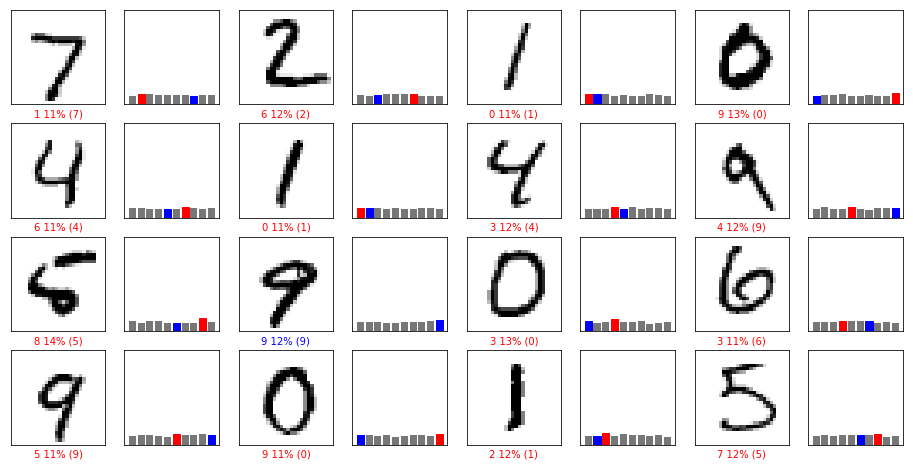

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)]) 

model.compile(optimizer='sgd',
             loss='mean_squared_error',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(images):
    plt.subplot(rows, 2*columns, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(rows, 2*columns, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()